How to use memory-fs and rewire to audit cli events?



In [ ]:
var path = require('path');

// TODO: use https://github.com/jhnns/rewire for replacing variables, something like https://github.com/mariocasciaro/object-path?

function mockTypescriptFs(root, data) {
    var mock = require('mock-require');
    var memfs = require('memfs');
    var mem = new memfs.Volume;
    var unionfs = require('unionfs');
    var fs = require('fs');

    mem.mountSync(root, data);

    // Create a union of two file systems:
    unionfs
        .use(fs)
        .use(mem)
        .replace(fs);

    var ts = require('typescript');
    var tsMock = Object.assign({}, ts);
    var toMock = {
        readFile: 'readFileSync',
        realpath: 'realpathSync',
        writeFile: 'writeFileSync',
        fileExists: 'existsSync',
        directoryExists: 'existsSync',
        createDirectory: 'mkdirSync',
        getDirectories: 'readdirSync'
    };
    Object.keys(toMock)
        .forEach(k => {
            if (typeof mem[toMock[k]] === 'function') {
                tsMock.sys[k] = function () {
                    // typescript.sys functions return defined on error
                    try {
                        return mem[toMock[k]].apply(mem, arguments);
                    } catch (e) {
                        return;
                    }
                };
            }
        });

    mock('typescript', tsMock);
    return mock;
};
mockTypescriptFs;

// TODO: search github for projects like graceful-fs and then search google for projects that use graceful-fs and see if we can record some filesystem activity



project word-cloud?



In [ ]:
var importer = require('../Core');
var path = require('path');
var d3CloudToSVG = importer.import('d3.ipynb[create word-cloud]');
    
function projectWordCloud(project) {
    var relativePaths = importer.import('relative paths and includes', {project});
    var words = [];

    function wordCount(r) {
        var words = r['packages'].map(p => p.split('.ts/')[1])
            .concat(r['packages'].map(p => path.basename(p.split('.ts/')[0])))
            .concat(r['relatives'].map(r => path.basename(r)))
            .concat(r['relatives'].map(r => path.basename(r.split('.ts/')[0])));
        var wordCount = {};
        words.forEach(w => {
            if (typeof wordCount[w] === 'undefined') {
                wordCount[w] = 15;
            } else {
                wordCount[w]++;
            }
        });
        return Object.keys(wordCount).map((d) => ({text: d, size: wordCount[d]}));
    };

    return relativePaths(project)
        .then(words => d3CloudToSVG(wordCount(words)));
};
module.exports = projectWordCloud;



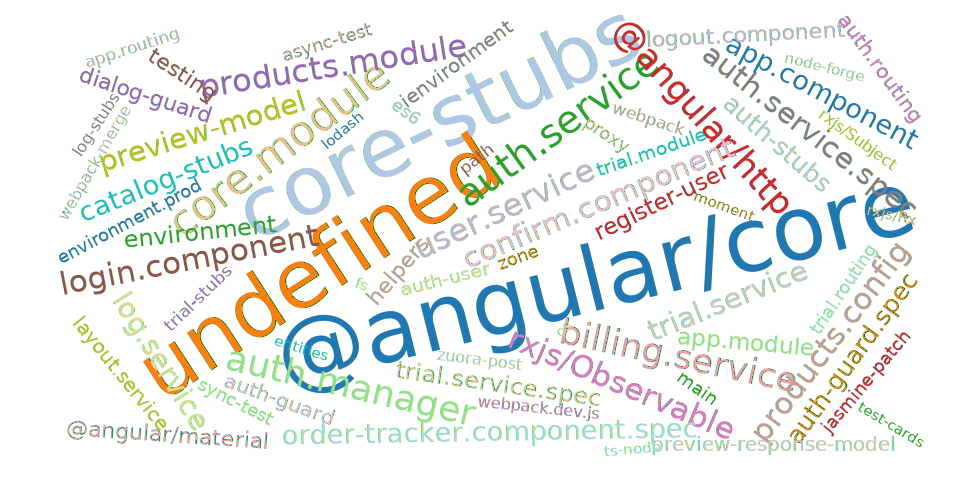

In [2]:
// TODO: create a gulp stream angular component out of it
// TODO: connect with gulp-git https://www.npmjs.com/package/gulp-git
// install https://github.com/Automattic/node-canvas/wiki/installation---osx
// install using brew install pkg-config fontconfig cairo pixman giflib libjpeg libpng
var importer = require('../Core');
var path = require('path');
var projectWordCloud = importer.import('file system.ipynb[project word-cloud]');

var PROFILE_PATH = process.env.HOME || process.env.HOMEPATH || process.env.USERPROFILE;
var project = PROFILE_PATH + '/Documents/portal';

$$.async()
projectWordCloud(project)
    .then(svg => $$.svg(svg))
    .catch(e => $$.sendError(e));



project imports d3 tree?



In [12]:
var importer = require('../Core');
var path = require('path');
var formatNodes = importer.import('d3.ipynb[format tree]');
var d3TieredPieSVG = importer.import('d3.ipynb[display d3 tree]');

var extensions = /\.(ts|js|ipynb)\//ig;

function icons(c) {
    return c.replace('.component', '\u2699')
           .replace('.module', '\u26E9')
           .replace('.service', '\u26F4')
           .replace('.routing', '\u2697');
}

function wordCount(r) {
    var words = r['packages'].map(p => p.split(extensions)[2])
        .concat(r['packages'].map(p => path.basename(p.split(extensions)[0])))
        .concat(r['relatives'].map(r => path.basename(r)))
        .concat(r['relatives'].map(r => path.basename(r.split(extensions)[0])));
    var wordCounts = {};
    words.forEach(w => {
        if (typeof wordCounts[w] === 'undefined') {
            wordCounts[w] = 1;
        } else {
            wordCounts[w]++;
        }
    });
    var resultWords = Object.keys(wordCounts).map((d, i) => ({
        name: icons(d),
        branch: ((/\.component|\.module|\.service|\.routing/ig).exec(d) || {})[0],
        size: wordCounts[d]}));
    var edges = [];
    r['packages'].forEach(p => edges[edges.length] = {
        source: icons(p.split(extensions)[2]),
        target: icons(path.basename(p.split(extensions)[0]))
    });
    r['relatives'].forEach(p => edges[edges.length] = {
        source: icons(path.basename(p.split(extensions)[0])),
        target: icons(path.basename(p.split(extensions)[2]))
    });
    return {nodes: resultWords, edges: edges};
};

var formatNodes;
function projectTree(project) {
    var projectRelatives = importer.import('relative paths and includes', {project});
    var words = [];
    
    return projectRelatives(project)
        .then(words => {
            var tree = wordCount(words);
            var nodeNames = tree.nodes.map(n => n.name);
            tree.nodes = tree.nodes
                .filter((n, i, arr) => nodeNames.indexOf(n.name) === i)
                .map((n, i) => {
                    Object.assign(n, {index: tree.nodes
                                      .filter(f => f.branch === n.branch).indexOf(n)})
                    return n;
                })
            var edgeNames = tree.edges.map(n => n.source + '/' + n.target);
            tree.edges = tree.edges
                .filter((n, i, arr) => edgeNames.indexOf(n.source + '/' + n.target) === i)
            var root = formatNodes(tree.nodes, tree.edges);
            return d3TieredPieSVG(root);
        })
        .catch(e => console.log(e))
};
module.exports = projectTree;




[Function: projectTree]

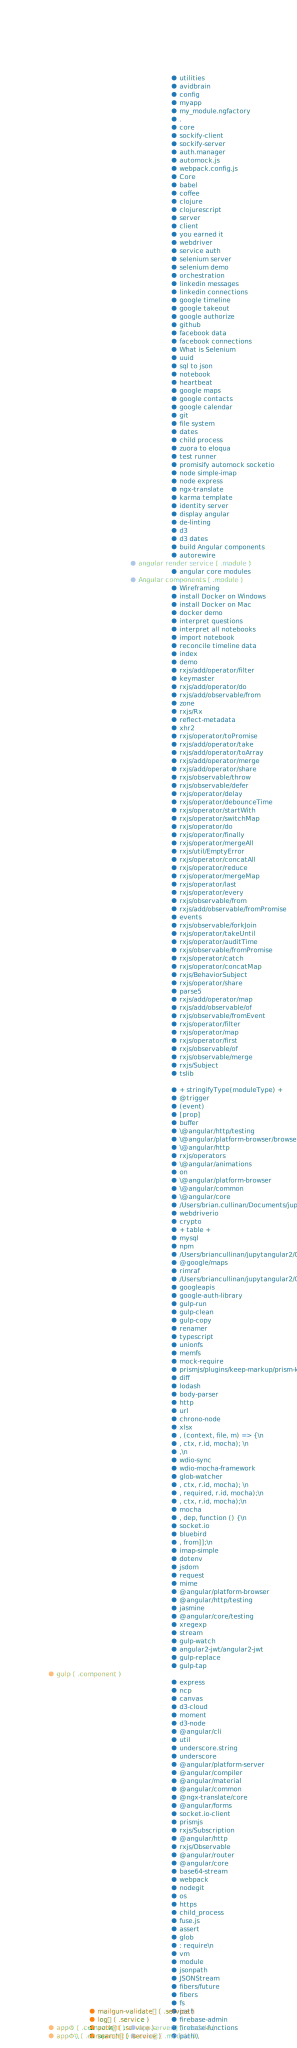

In [1]:
// TODO: create a gulp stream angular component out of it
// TODO: connect with gulp-git https://www.npmjs.com/package/gulp-git
// install https://github.com/Automattic/node-canvas/wiki/installation---osx
// install using brew install pkg-config fontconfig cairo pixman giflib libjpeg libpng
var path = require('path');
var importer = require('../Core');
var formatNodes = importer.import('d3.ipynb[format d3 tree]');
var projectTree = importer.import('file system.ipynb[project imports d3 tree]', {formatNodes});

var PROFILE_PATH = process.env.HOME || process.env.HOMEPATH || process.env.USERPROFILE;
var project = PROFILE_PATH + '/jupytangular2';

$$.async()
projectTree(project)
    .then(svg => $$.svg(svg))
    .catch(e => $$.sendError(e));


Find similar filename in project?



In [ ]:
var glob = require('glob');
function findSimilarFile(base, project) {
    return new Promise((resolve, reject) => {
        var searchStrings = '**/' + base + '.ts';
        console.log('Search for ' + searchStrings);
        glob(searchStrings, {
            ignore: ['**/node_modules/**'],
            cwd: project
        }, function (err, matches) {
            var isEmpty = matches.length == 0;
            if (err) {
                return reject(err);
            } else if (isEmpty) {
                console.log('No matches for ' + searchStrings)
                return resolve();
            }

            // TODO: try to build and make sure it works before patching
            resolve(matches[0].replace('.ts', ''));
        });
    });
};
module.exports = findSimilarFile;
findSimilarFile;



Fix project paths?



In [ ]:
var importer = require('../Core');
var path = require('path');
var gulp = require('gulp');
var tap = require('gulp-tap');
var replace = require('gulp-replace');

// list all broken references in modules?
var {
    getRelativeImports, tasksToPromise, findSimilarFile
} = importer.import([
    'relative paths and includes',
    'task to promise',
    'similar filename in project'
], {gulp});

function projectRelatives(project) {
    var missing, missingPackages;

    function fixRelative(m, match) {
        if (typeof m === 'undefined') {
            return;
        }
        var file = m.split('.ts/')[0] + '.ts';
        var fromPath = m.split('.ts/')[1];
        var newRelative = path.relative(path.dirname(file), path.join(project, match));
        gulp.task('fix include', function () {
            var fixFile = path.relative(project, file);
            console.log('Replacing ' + fromPath + ' -> ' + newRelative + ' in ' + fixFile)
            return gulp.src(['**/' + fixFile], {cwd: project})
                .pipe(replace(fromPath, newRelative))
                .pipe(gulp.dest(project));
        });

        return tasksToPromise(['fix include'], []);
    };

    var uniqueArray = (arr) => arr.filter((value, index, array) => array.indexOf(value, index + 1) < 0);

    gulp.task('add packages', function () {
        var toAdd = '';
        return gulp.src('package.json', {cwd: project})
            .pipe(tap(file => {
                // TODO: resolve using existing package.json from another project?  This method of using the import isn't going to go far, how does NPM do this?
                // Possible to search for top two directories? @angular/material versus angular2-jwt versus zone.js/dist/zone
                var content = file.contents.toString();
                missingPackages.map(p => p.split('.ts/')[1].forEach(m => {
                    if (content.indexOf(m) === -1) {
                        toAdd += '"' + m + '": "latest",'
                    }
                }));
                if (toAdd !== '') {
                    console.log('Adding ' + toAdd);
                    file.contents = new Buffer(content.replace(/"dependencies"\s*:\s*\{/ig, (m) => m + toAdd));
                }
            }))
            .pipe(gulp.dest(project));
    });

    return getRelativeImports(project)
        .then(r => {
            missing = r['missing'];
            missingPackages = r['missingPackages'];
            return Promise.all(Object.keys(missing).map(k => findSimilarFile(k, project).then(f => {
                if (typeof f === 'undefined') {
                    return Promise.resolve();
                }
                return Promise.all(missing[k].map(m => fixRelative(m, f)));
            })));
        })
        .then(r => tasksToPromise(['add packages']));
    // TODO: try building with all results resolved
    // TODO: create path and apply
};
module.exports = projectRelatives;


list project files?

List files in a project excluding some excessive searches locations?



In [ ]:
var glob = require('glob');
var path = require('path');

// TODO: pull all from gitignore library and add to ignore list
//  https://github.com/github/gitignore
// TODO: submit script to github project for fame and fortune!

// But we also want to automatically load projects?
function listInProject(root, match = '{,*,*/,*/*/*,*/*/*/*,*/*/*/*/*}package.json') {
    return glob.sync(match, {
        ignore: ['**/node_modules/**',
            '**/packages/**',
            '**/vendor/**',
            '**/*test*/*',
            '**/*Test*/*',
            '**/Downloads/**',
            '**/bin/**',
            '**/obj/**',
            '**/Library/**',
            '**/Applications/**',
            '**/AppData/**',
            '**/Trash/**',
            '**/Music/**',
            '**/wp-content/**',
            '**/wp-includes/**',
            '**/Pods/**',
            '**/svn/**',
            '**/lib/**',
            '**/.git/**',
            '**/.vscode/**',
            '**/.npm/**',
            '**/\\.*',
            '**/.*',
            '**/Cache/**',
            '**/Creative Cloud Files/**'],
        cwd: path.resolve(root),
        silent: true,
        nodir: true,
        strict: false
    })
    .map(m => path.join(root, m))
};
module.exports = listInProject;
listInProject;



List all projects by names?



In [6]:
var importer = require('../Core');
var path = require('path');
var listInProject = importer.import('list project files');

// But we also want to automatically load projects?
function listProjects(root, match = '{,*,*/,*/*/*,*/*/*/*,*/*/*/*/*}+(package.json|NuGet.config|*.sln|*.csproj)') {
    var result = {};
    var matches = listInProject(root, match);
    matches.forEach(m => {
        var projectPath = path.resolve(path.dirname(m));
        result[path.basename(projectPath)] = projectPath;
    });
    return result;
};
module.exports = listProjects;
listProjects;



[Function: listProjects]

test project files list


In [7]:
var importer = require('../Core');
var listInProject = importer.import('list project files');
var listProjects = importer.import('list all projects names');

var PROFILE_PATH = process.env.HOME || process.env.HOMEPATH || process.env.USERPROFILE;

describe('file system service', () => {
    beforeEach(() => {
    })
    
    it('should list files quickly', () => {
        var files = listInProject(PROFILE_PATH);
        console.log(files.length);
        assert(files.length > 0);
    })
    
    it('should ignore hidden directories for better performance', () => {
        var files = listProjects(PROFILE_PATH);
        console.log(files.portal);
        assert(files.portal.indexOf('portal') > -1);
    })
})

ReferenceError: describe is not defined

Find too long of functions using regexp?
(?=\{((?:[^{}]++|\{(?1)\})++)\})

TODO: turn this in to a bs-lint test


In [2]:
var importer = require('../Core');
var tasksToPromise = importer.import('tasks to promise', {gulp});
var gulp = require('gulp');
var tap = require('gulp-tap');
var XRegExp = require('xregexp');

// How to convert a string to an Array of RegEx matches
function regexToArray(ex, str, i = 0) {
    var co = [];
    var m;
    while ((m = re.exec(str)) && co.push(m[i])) ;
    return co;
};

function matchCurlyBraces(contents) {
    var newMatches = XRegExp.matchRecursive(contents, '{', '}', 'gi', {
        valueNames: ['literal', null, 'value', null]
    }).filter(m => m.name === 'value');
    //console.log(newMatches);
    return newMatches.reduce(
        (arr, m) => arr.concat(matchCurlyBraces(m.value)),
        newMatches);
};

function findLongFunctions(project) {
    var results = [];
    gulp.task('find long functions', function () {
        return gulp.src('**/*.+(ts|js|cs)', {
            ignore: ['**/node_modules/**',
                '**/dist/**',
                '**/typings/**',
                '**/packages/**',
                '**/*.spec*',
                '**/*.Tests/**'
            ], cwd: project
        })
            .pipe(tap(file => {
                const contents = file.contents.toString();
                try {
                    results = results.concat(matchCurlyBraces(contents)
                        .map(m => Object.assign(m, {path: file.path})));
                } catch (e) {
                    results = results.concat([{
                        name: 'value',
                        value: file.contents.toString(),
                        start: 0,
                        end: file.contents.length,
                        error: e,
                        path: file.path
                    }]);
                }
            }));
    });

    return tasksToPromise(['find long functions'])
        .then(() => {
            var code = results.map(r => r.value);
            var topLevel = results
                .filter(r => code
                    .filter(c => c !== r.value && c.indexOf(r.value) > 0).length === 0);
            results = results
                .filter(m => topLevel.filter(c => c.value === m.value).length === 0);
            code = results.map(r => r.value);
            topLevel = topLevel.concat(results.filter(r => code
                .filter(c => c !== r.value && c.indexOf(r.value) > 0).length === 0));
            results = results
                .filter(m => topLevel.filter(c => c.value === m.value).length === 0);
            return results
                .filter(m => m.value.split(/\n/ig).length > 100)
        });
};
module.exports = findLongFunctions;


[Function: findLongFunctions]

In [4]:
var PROFILE_PATH = process.env.HOME || process.env.HOMEPATH || process.env.USERPROFILE;
var project = PROFILE_PATH + '/Documents/asm';

$$.async();
findLongFunctions(project)
    .then(e => $$.sendResult(e.map(m => m.path)))
    .catch(e => $$.sendError(e))


[ '/Users/briancullinan/Documents/asm/Subscription.Entitlement/Subscription.Entitlement/Global.asax.cs',
  '/Users/briancullinan/Documents/asm/Subscription.Integrations/Subscription.Integrations.Zuora/ZuoraCatalogService.cs',
  '/Users/briancullinan/Documents/asm/Subscription.Entitlement/Subscription.Entitlement/App_Start/SwaggerConfig.cs',
  '/Users/briancullinan/Documents/asm/Subscription.Entitlement/Subscription.Entitlement/App_Start/SwaggerConfig.cs',
  '/Users/briancullinan/Documents/asm/Subscription.MyAct/Subscription.ECommerce/App_Start/SimpleInjectorInitializer.cs',
  '/Users/briancullinan/Documents/asm/Subscription.MyAct/Subscription.ECommerce/Models/CountryModel.cs',
  '/Users/briancullinan/Documents/asm/Subscription.MyAct/Subscription.ECommerce/Scripts/bootstrap-select.js',
  '/Users/briancullinan/Documents/asm/Subscription.MyAct/Subscription.ECommerce/Scripts/bootstrap-select.js',
  '/Users/briancullinan/Documents/asm/Subscription.MyAct/Subscription.ECommerce/Scripts/bootst